In [1]:

import pandas as pd 
import os

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [3]:

# Path to your dataset
train_dir = 'C:\\Users\\ANN MARIYA\\Desktop\\main project\\Training'
test_dir = 'C:\\Users\\ANN MARIYA\\Desktop\\main project\\Testing'

In [4]:
# Image properties
img_size = (150, 150) # Defines the size of input images (width, height)
batch_size = 32


In [5]:
# Define train data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=20,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,   
    fill_mode='nearest'     
)

In [6]:
# Define test data augmentation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load training dataset
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# Load testing dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
# Get class names from the training data generator
class_names = train_data.class_indices.keys()  
print("Classes:", list(class_names))


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [9]:
# Define CNN model


model = Sequential([
    Input(shape=(150, 150, 3)),  # Define input shape here
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])


In [10]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
    )

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 122s 681ms/step - accuracy: 0.8937 - loss: 0.2854 - val_accuracy: 0.8833 - val_loss: 0.3050
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 548ms/step - accuracy: 0.9179 - loss: 0.2369 - val_accuracy: 0.9031 - val_loss: 0.2479
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 552ms/step - accuracy: 0.9125 - loss: 0.2402 - val_accuracy: 0.7857 - val_loss: 0.6342
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 511ms/step - accuracy: 0.9032 - loss: 0.2569 - val_accuracy: 0.8642 - val_loss: 0.3513
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 490ms/step - accuracy: 0.9104 - loss: 0.2354 - val_accuracy: 0.8886 - val_loss: 0.2985
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 493ms/step - accuracy: 0.9142 - loss: 0.2293 - val_accuracy: 0.8848 - val_loss: 0.2979
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 492ms/step - accuracy: 0.9109 - loss: 0.2348 - val_accuracy: 0.8322 - val_loss: 0.4803
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 499ms/step - accuracy: 0.9107 - loss: 

In [15]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9170 - loss: 0.2508
Test Accuracy: 91.99%
Test Loss: 0.2206


In [16]:
model.save("brain_tumor_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


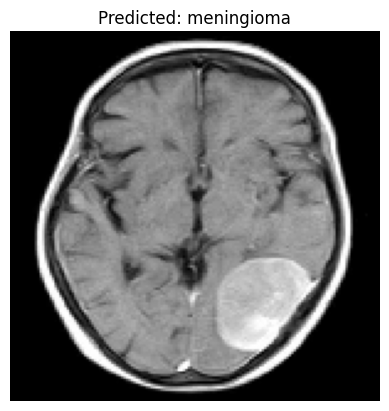

Predicted Class: meningioma


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1: Load the trained model
model = load_model("brain_tumor_model.keras")  # Ensure the correct path

# Step 2: Load and preprocess the new image
img_path = "Testing\meningioma\Te-meTr_0004.jpg" # Replace with the actual image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Step 3: Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get the index of the highest probability

# Step 4: Get class labels from training data
class_labels = list(train_data.class_indices.keys())  # Replace with your class labels
predicted_label = class_labels[predicted_class]

# Step 5: Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

print(f"Predicted Class: {predicted_label}")